<a href="https://colab.research.google.com/github/Mohammad-Shiblu/Pytorch_Tutorial/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Coputer vision libraries in pytorch

* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models`  - get pretrained computer vision models that can be leverage for our problems
* `torchvision.transforms` - functions for manupulating your vision data (images) to be suitable for use with an ML model
* `torch.utilis.data.Dataset` - Base dataset class for Pytorch
* `torch.utilis.data.Dataloader` - Creates a Python iterable over a dataset

In [1]:
# import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets


In [2]:
# Set up training data
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to?
    train = True,  # do we wnat the trainig dataset
    download = True,
    transform = ToTensor(),
    target_transform = None
)
test_data = datasets.FashionMNIST(
    root = "data", # where to download data to?
    train = False,  # do we wnat the trainig dataset
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17632054.90it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 332577.21it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5512595.46it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8926116.99it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

### 1.2 Visualizing our data

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'label')

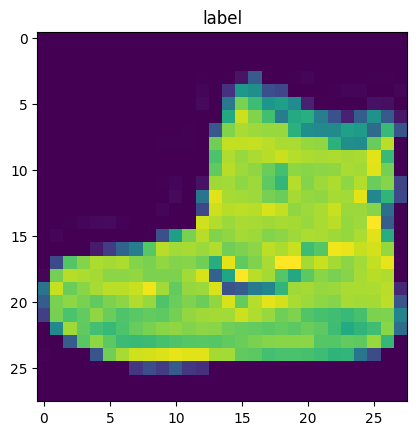

In [9]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title("label")

(-0.5, 27.5, 27.5, -0.5)

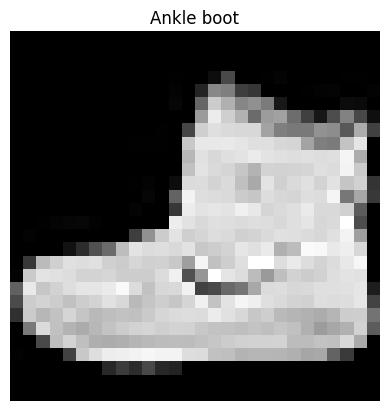

In [10]:
plt.imshow(image.squeeze(), cmap= "gray")
plt.title(class_names[label])
plt.axis(False)

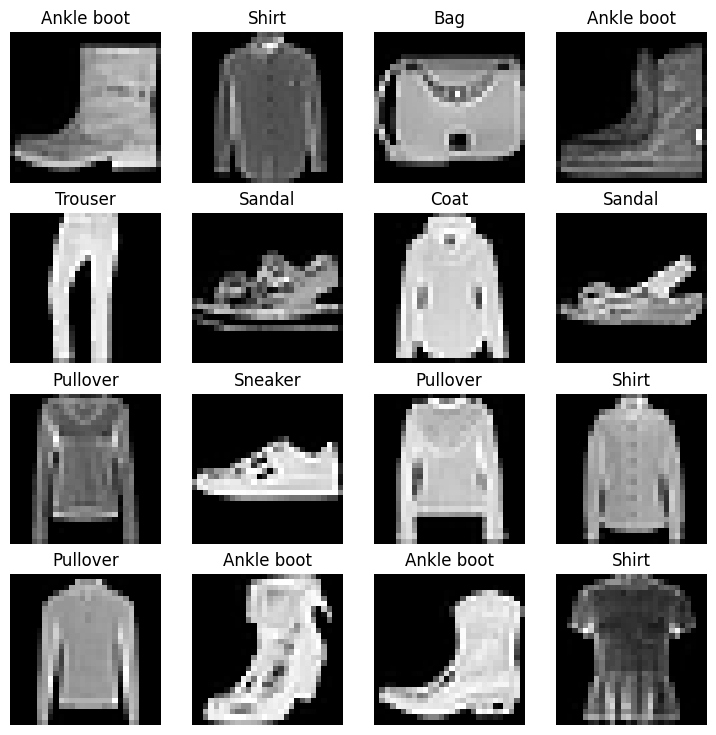

In [11]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=(1,)).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap= "gray")
  plt.title(class_names[label])
  plt.axis(False)


In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader
Right now, our data is in the form of Pytorch datasets.

DataLoader turns our dataset into a Python iterable.
More specifically, we want to turn our data intpo batches (or mini-batches)



In [13]:
# FashionMNIST: Batched
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size= BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a5b67053b20>,
 <torch.utils.data.dataloader.DataLoader at 0x7a5b69625840>)

In [14]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Lenth of train dataloader: {len(train_dataloader)}")
print(f"Length of test dataloader: {len(test_dataloader)}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a5b67053b20>, <torch.utils.data.dataloader.DataLoader object at 0x7a5b69625840>)
Lenth of train dataloader: 1875
Length of test dataloader: 313


In [15]:
# check out whats inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label: 8


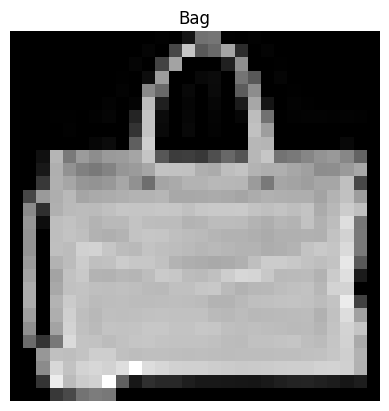

In [16]:
# show a smaple
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label: {label}")

In [17]:
## 3. Model 0: Build a baseline model

# create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape
# Flatten the sample
output = flatten_model(x) # perform forward pass
# print out whats happen
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flatenning: {output.shape}")



Shape before flattening: torch.Size([1, 28, 28])
Shape after flatenning: torch.Size([1, 784])


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape,
                  out_features= hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)


In [19]:
torch.manual_seed(42)

# Setup model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_units = 10,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Set up optimizer and loss function

* Loss function- nn.CrossEntropyLoss()
* optimizer - torch.optim.SGD()
* Evaluation metric - Use accuracy

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [23]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [24]:
# how fast the model runs
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time. """
  total_time = end-start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [25]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu:  0.000 seconds


5.7708999989358745e-05

## Creating a training loop and training a model on bathches of data
1. Loop through rpochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out whats happening.
5. Time it all.

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of opochs
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}?n-------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)

    train_loss += loss   # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # 6. print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/ {(len(train_dataloader.dataset))}")

  # Divide total train loss by length of train data loader
  train_loss /= len(train_dataloader)

  # Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true =y_test, y_pred= test_pred.argmax(dim=1))

    # Calculate the test_loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test_acc avaerage per batch
    test_acc /= len(test_dataloader)

  # Print out whast happeining
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss: .4f} | Test_acc: {test_acc: .4f}")

# Calculate train time

train_time_end_on_cou = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu,
                                 end = train_time_end_on_cou,
                                 device = str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0?n-------
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss: 0.5904 | Test loss:  0.5095 | Test_acc:  82.0387
Epoch: 1?n-------
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss: 0.4763 | Test loss:  0.4799 | Test_acc:  83.1969
Epoch: 2?n-------
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss: 0.4550 | Test loss:  0.4766 | Test_acc:  83.4265
Train time on cpu:  33.960 seconds


## Make predictions and get Model_0 results


In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """Returns a dictionary conatining the results of model prediction data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                          y_pred = y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}



In [28]:
# claculate model 0 results on test dataset
model_0_results = eval_model(model= model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5.setup device agnostic code (for using a GPU if there is one)

In [29]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [30]:

torch.cuda.is_available()

False

In [31]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Model 1: Building a better model with non-linearity

In [32]:
# Create a non linear model
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.tensor):
    return self.layer_stack(x)



In [33]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [34]:
## Setup loss, optimizer and evaluatio  metrices

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params =model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation/ testing loop



In [35]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a training with model trying to learn on data_loader."""

  train_loss , train_acc = 0, 0
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    # put data on target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # Calculate loss and accuracy per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true =y,
                             y_pred = y_pred.argmax(dim=1))

    # optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # optimizer_step
    optimizer.step()

  # Divide total train loss by length of train data loader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:0.5f} | Train acc: {train_acc: .2f}")


In [36]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """ Perform a testing loop step on model over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval model
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      # send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                           y_pred = test_pred.argmax(dim=1))

      # Adjust metrice and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss: 0.5f} | Test acc: {test_acc:.2f}\n")

In [37]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# Cerate a optimization and evaluation loop using train_step() and test step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}\n----------- ")
  train_step(model = model_1,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_tain_time_model_1 = print_train_time(start= train_time_start_on_gpu,
                                           end= train_time_end_on_gpu,
                                           device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
----------- 
Train Loss: 1.09199 | Train acc:  61.34
Test loss:  0.95636 | Test acc: 65.00

Epoch 1
----------- 
Train Loss: 0.78101 | Train acc:  71.93
Test loss:  0.72227 | Test acc: 73.91

Epoch 2
----------- 
Train Loss: 0.67027 | Train acc:  75.94
Test loss:  0.68500 | Test acc: 75.02

Train time on cpu:  33.630 seconds


In [38]:
model_1_results = eval_model(model= model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [39]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [40]:
total_train_time_model_0

33.960047794000005

### Model 2: Building a Convolutional neural network

In [41]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """Model architechture that replicates the TinyVGG
  model from CNN explainer website."""
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride = 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels= hidden_units,
                  kernel_size =3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7,
                  out_features= output_shape),

    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x


In [42]:
image.shape

torch.Size([1, 28, 28])

In [43]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

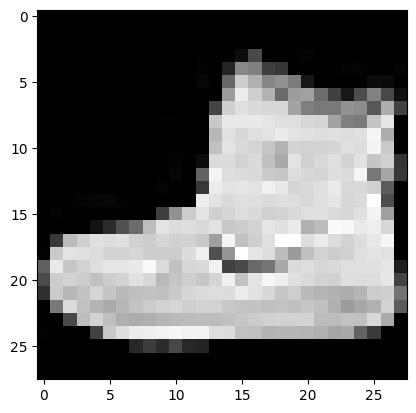

In [44]:
plt.imshow(image.squeeze(), cmap="gray")

In [45]:
# pass through the forward pass
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape
model_2(rand_image_tensor.unsqueeze(0)).to(device)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

## Stepping throuhg nn.Conv2d

In [46]:
torch.manual_seed(42)
# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single Image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")


Image batch shape: torch.Size([1, 28, 28])
Single Image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [47]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels =3,
                       out_channels =10,
                       kernel_size =3,
                       stride =1,
                       padding=1)
# pass the data through convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [48]:
test_image.shape

torch.Size([3, 64, 64])

### Stepping through `nn.MaxPool2d`

In [49]:
test_image.shape

torch.Size([3, 64, 64])

In [50]:
# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through Conv_layer: {test_image_through_conv.shape}")

# Pass data through max pool layer
test_image_through_conv_max = max_pool_layer(test_image_through_conv)
print(f"Shape after going through Conv_layer and pool layer: {test_image_through_conv_max.shape}")

Shape after going through Conv_layer: torch.Size([10, 64, 64])
Shape after going through Conv_layer and pool layer: torch.Size([10, 32, 32])


## Set up a loss function and optimizer for model_2


In [51]:
# Setup loss function/eval metrices / optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(),
                            lr = 0.1)

## Training and testing `Model_2` using training and test function

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Meaure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs =3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")
  train_step(model= model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model=model_0,
            data_loader= test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train Loss: 0.59518 | Train acc:  78.38
Test loss:  0.47664 | Test acc: 83.43

Epoch: 1

Train Loss: 0.36536 | Train acc:  86.90
Test loss:  0.47664 | Test acc: 83.43

Epoch: 2

Train Loss: 0.32588 | Train acc:  88.13
Test loss:  0.47664 | Test acc: 83.43

Train time on cpu:  165.955 seconds


In [53]:
# Get model_2 results
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn= accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [54]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [55]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Compare model and training time

In [56]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [57]:
# Add training time to result comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_tain_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,33.960048
1,FashionMNISTModelV1,0.685001,75.019968,33.629511
2,FashionMNISTModelV2,0.327190,88.069089,165.954732


Text(0, 0.5, 'model')

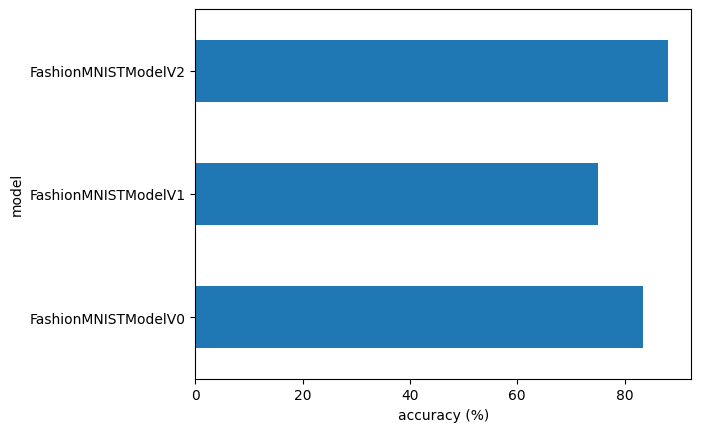

In [58]:
# Visualize the model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

### Make and evaluate random predictions with best model

In [59]:
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample (add a batch dimension and pass to the target device)
      sample = torch.unsqueeze(sample, dim= 0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob= torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred prob off GPU
      pred_probs.append(pred_prob.cpu())

# stack the pred probs to turn the list into a tensor
  return torch.stack(pred_probs)

In [60]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [61]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [62]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

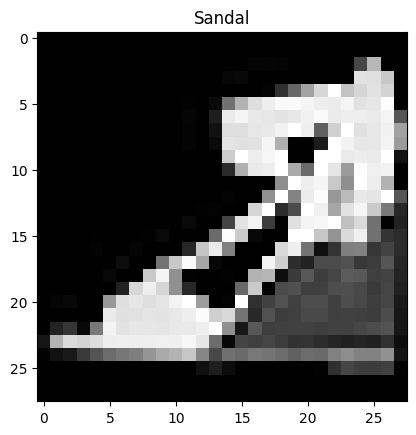

In [63]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [64]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data= test_samples)
pred_probs[:2]

tensor([[4.6025e-05, 5.6379e-07, 1.0680e-05, 6.6638e-07, 1.6658e-07, 9.9740e-01,
         1.0603e-05, 1.2546e-03, 8.0804e-05, 1.1969e-03],
        [8.3228e-04, 2.4093e-05, 7.2128e-03, 4.1486e-05, 9.4209e-01, 2.2711e-06,
         4.9759e-02, 1.1348e-06, 3.1570e-05, 3.6539e-06]])

In [65]:
# convert predictionprobabilities into labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 4, 0, 6, 2, 1, 0, 2, 4])

In [66]:
test_labels

[5, 4, 0, 2, 2, 1, 0, 6, 4]

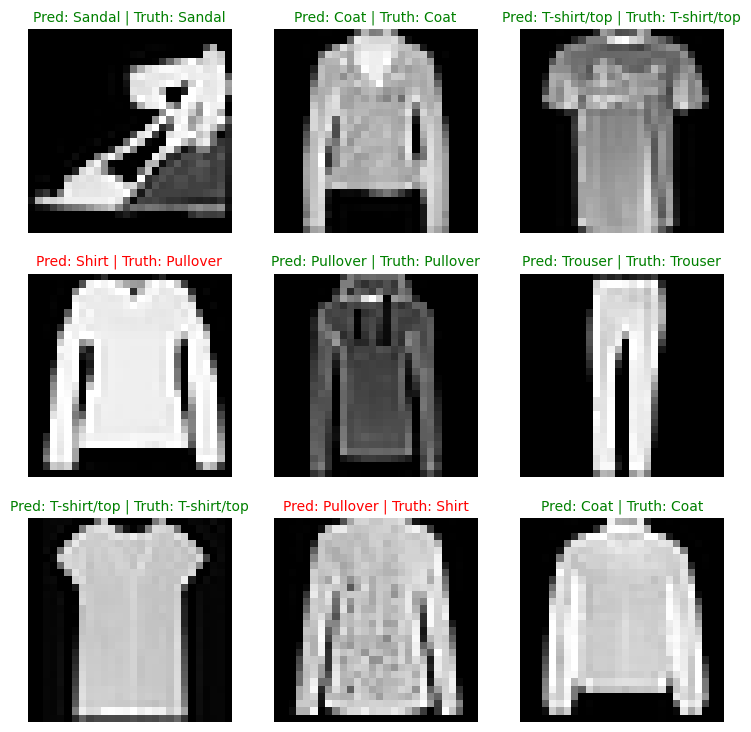

In [67]:
plt.figure(figsize=(9,9))
nrows = 3
ncols =3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label
  pred_label = class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check for equality between pred aand truth
  if pred_label == truth_label:
    plt.title(title_text, fontsize =10, c="g" )
  else:
    plt.title(title_text, fontsize= 10, c="r")

  plt.axis(False)


## Confusion Matrix using "torchmetrices.ConfusionMatrix"

In [71]:
from tqdm.auto import tqdm

# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> predictin probabilities -> predictions labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concantenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [74]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 5.8 MB/s eta 0:00:00


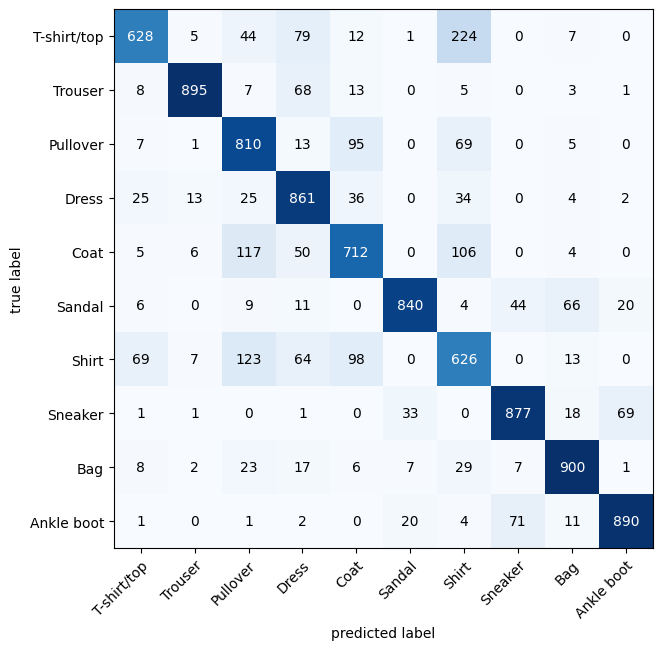

In [79]:

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib work with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## Save and Load best performimng model

In [81]:
from pathlib import Path

# Create  model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True,
                  exist_ok = True)

MODEL_NAME = "03_Pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model_state_dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to:models/03_Pytorch_computer_vision_model_2.pth


In [82]:
# Create a New instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state dict()
loaded_model_2.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [83]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [84]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [85]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)